<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их" data-toc-modified-id="Откроем-файлы-и-изучим-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их</a></span></li><li><span><a href="#Проверка-расчета-эффективности" data-toc-modified-id="Проверка-расчета-эффективности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности</a></span></li><li><span><a href="#Анализ-признаков-недоступных-в-тестовой-выборке." data-toc-modified-id="Анализ-признаков-недоступных-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков недоступных в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-метталов" data-toc-modified-id="Изменение-концентрации-метталов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации метталов</a></span></li><li><span><a href="#Распределение-размеров-гранул-исходного-сырья" data-toc-modified-id="Распределение-размеров-гранул-исходного-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул исходного сырья</a></span></li><li><span><a href="#Cуммарная-концентрация-металлов-на-разных-стадиях" data-toc-modified-id="Cуммарная-концентрация-металлов-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cуммарная концентрация металлов на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Восстановление золота из руды

Требуется подготовить прототип модели машинного обучения для компании которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**План работы:**

1. Подготовить данные
2. Провести исследовательский анализ данных
3. Построить и обучить модель


## Подготовка данных

### Откроем файлы и изучим их

In [ ]:
# загрузим требуемые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler

In [ ]:
# откроем и сохраним датасеты
# установим параметр для отображения всех колонок датафреймов
pd.set_option('display.max_columns', None)
train = pd.read_csv('/datasets/gold_industry_train.csv')
test = pd.read_csv('/datasets/gold_industry_test.csv')
full = pd.read_csv('/datasets/gold_industry_full.csv')

Выведем первые пять строк каждого датафрейма

In [ ]:
train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [ ]:
test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [ ]:
full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

Выведем общую информацию о датафреймах

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Проверим файлы на пропуски и дубликаты

In [ ]:
train.isna().sum()

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

In [ ]:
test.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [ ]:
full.isna().sum()

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

In [ ]:
full.duplicated().sum()

0

**Вывод**

В датасетах train и full имеется по 87 столбцов с данными. В датаврейме test 53 колонки.

Во всех файлах есть пропуски. Полных дубликатов не обаружено.

Данный хранятся в формате float64, кроме столбца с датой.



### Проверка расчета эффективности

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между расчётами и значением признака.

In [ ]:
# создадим функцию, которая на вход принимает столбцы датафрейма:
#rougher.input.feed_au - до очистки
#rougher.output.tail_au - хвосты
#rougher.output.concentrate_au  - после очистки
#rougher.output.recovery - эффективность обогащения
# расчитавает эффективность и возвращает ее значения

def calculation_recovery (row):
    feed_au = row['rougher.input.feed_au']
    tail_au = row['rougher.output.tail_au']
    concentrate_au = row['rougher.output.concentrate_au']
    calculate_recovery = ((concentrate_au*(feed_au-tail_au))/(feed_au*(concentrate_au-tail_au)))*100
    return calculate_recovery

In [ ]:
# применим функцию к обучающей выборке
# посчитаем MAE для получившихся расчетных значений и столбца rougher.output.recovery

calculate_recovery = train.apply(calculation_recovery, axis=1)
recovery = train['rougher.output.recovery']
print('Средняя абсолютная ошибка:', mean_absolute_error(recovery, calculate_recovery))

Средняя абсолютная ошибка: 9.83758577644259e-15


**Вывод**

Средняя абсолютная ошибка составила 0.98375857764426, достаточно мало, что говорит о верности расчета эффективности обогащения в обучающей выборке.

### Анализ признаков недоступных в тестовой выборке.

Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [ ]:
# создадим цикл где сохраним названия признаков отсутствующих в тестовой выборке.

# сохраним названия столбцов в тестовой и обучающей выборке
columns_train = train.columns
columns_test = test.columns

# сделаем цикл, сохраним названия столбцов
count = 0
missing_columns = []
for i in columns_train:
    if i not in columns_test:
        missing_columns.append(i)
        count +=1
print('Все пропущено признаков:', count)
missing_columns

Все пропущено признаков: 34


['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

**Вывод**

Пропущено 34 признака

Из них:

4 признака на этапе флотации относятся к расчетным характеристикам

30 признаков  относятся к параметрам продукта для каждого этапа

Можно предположить, что эти данные не успели поступить, так как каждый этап технологического процесса требует времени.

В датафрейме нет целевых признаков rougher.output.recovery и final.output.recovery



### Предобработка данных

Заменим тип данных в столбце 'date' для всех датафреймов с object на datetime64

In [ ]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')

Добавим в датафрейм test столбцы с целевыми признаками rougher.output.recovery и final.output.recovery, возьмем данные из датафрейма full

In [ ]:
columns_merge = ['date', 'rougher.output.recovery', 'final.output.recovery']
full_recovery = full[columns_merge]

test = pd.merge(test, full_recovery, how='left', on=['date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4860 entries, 0 to 4859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        4860 non-null   datetime64[ns]
 1   rougher.input.feed_au                       4860 non-null   float64       
 2   rougher.input.feed_ag                       4860 non-null   float64       
 3   rougher.input.feed_pb                       4832 non-null   float64       
 4   rougher.input.feed_sol                      4838 non-null   float64       
 5   rougher.input.feed_rate                     4856 non-null   float64       
 6   rougher.input.feed_size                     4816 non-null   float64       
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64       
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64       
 9   rougher.

В обучающей и тестовой выборках есть пропуски. Удалим их.

Заменим пропученные значения в обущающей выборке, на предыдущие значения в столбце

In [ ]:
train.fillna(method='ffill', inplace=True)

In [ ]:
train.isna().sum()

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

In [ ]:
test.fillna(method='ffill', inplace=True)

In [ ]:
test.isna().sum()

date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

**Вывод**

Мы добавили в тестовую выборку столбцы с целевыми признаками


Заменили пропущенные значения в датафреймах train и test на предыдущие значения в столбцах.

## Анализ данных

### Изменение концентрации метталов

Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.

Построим распределения для концентрации золота на разных этапах производства

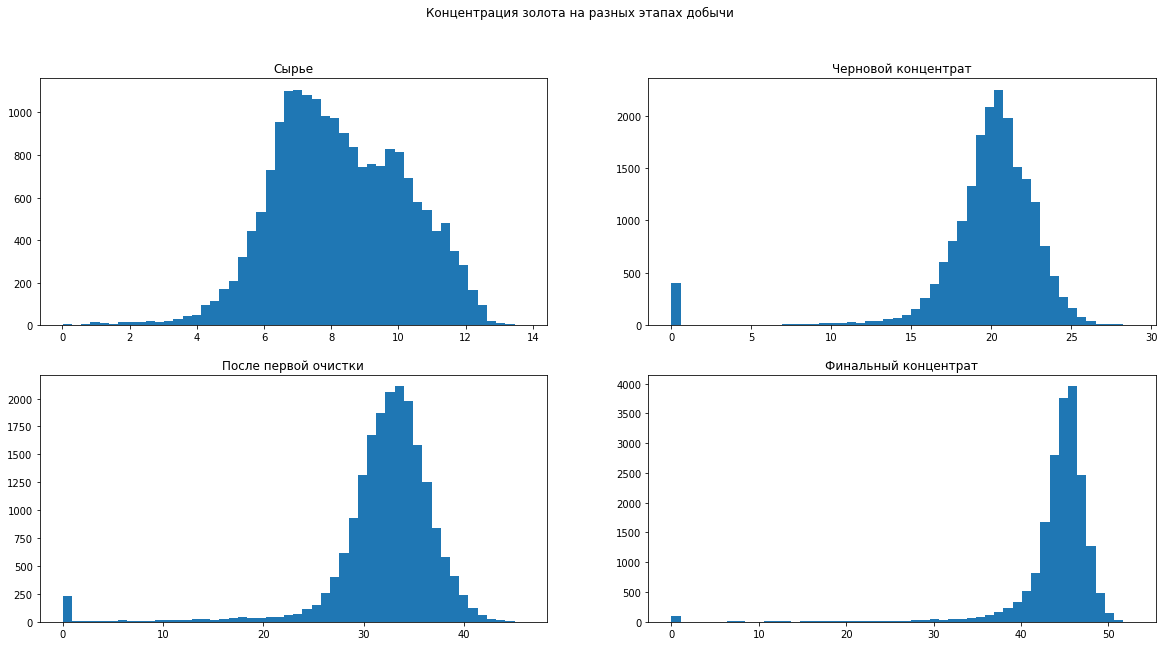

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0,0].hist(full['rougher.input.feed_au'], bins = 50)
axs[0,1].hist(full['rougher.output.concentrate_au'],bins = 50)
axs[1,0].hist(full['primary_cleaner.output.concentrate_au'],bins = 50)
axs[1,1].hist(full['final.output.concentrate_au'], bins = 50)

axs[0,0].set_title('Сырье')
axs[0,1].set_title('Черновой концентрат')
axs[1,0].set_title('После первой очистки')
axs[1,1].set_title('Финальный концентрат')
fig.suptitle('Концентрация золота на разных этапах добычи')
plt.show()

Построим распределения для концентрации серебра на разных этапах производства

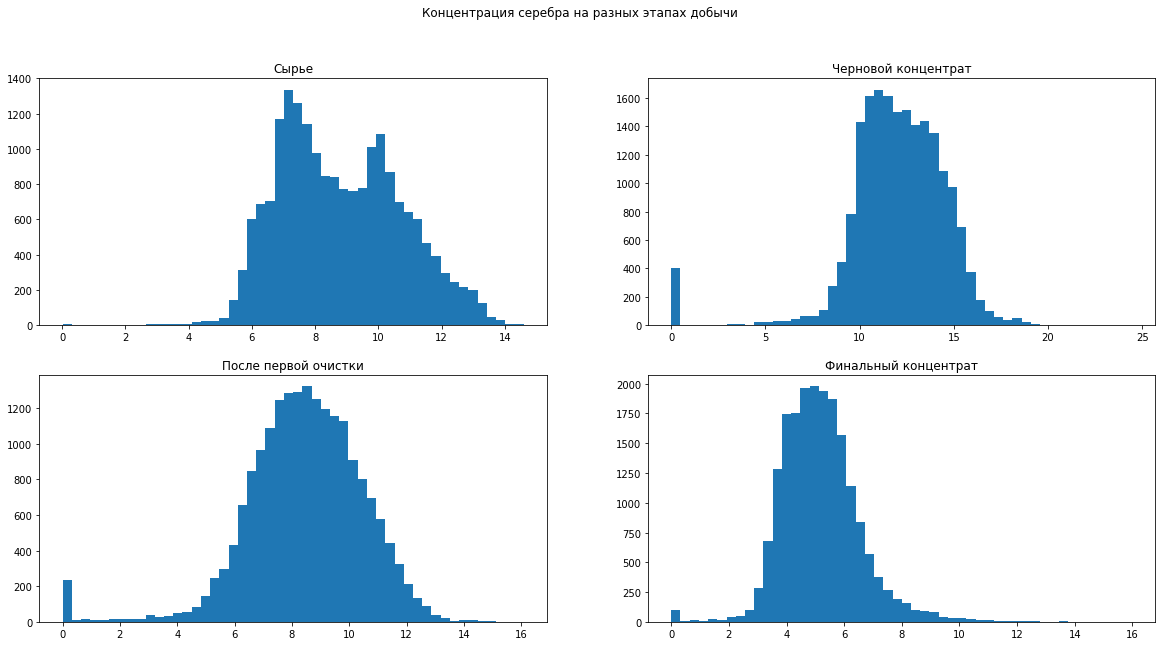

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0,0].hist(full['rougher.input.feed_ag'], bins = 50)
axs[0,1].hist(full['rougher.output.concentrate_ag'],bins = 50)
axs[1,0].hist(full['primary_cleaner.output.concentrate_ag'],bins = 50)
axs[1,1].hist(full['final.output.concentrate_ag'], bins = 50)

axs[0,0].set_title('Сырье')
axs[0,1].set_title('Черновой концентрат')
axs[1,0].set_title('После первой очистки')
axs[1,1].set_title('Финальный концентрат')
fig.suptitle('Концентрация серебра на разных этапах добычи')
plt.show()

Построим распределения для концентрации свинца на разных этапах производства

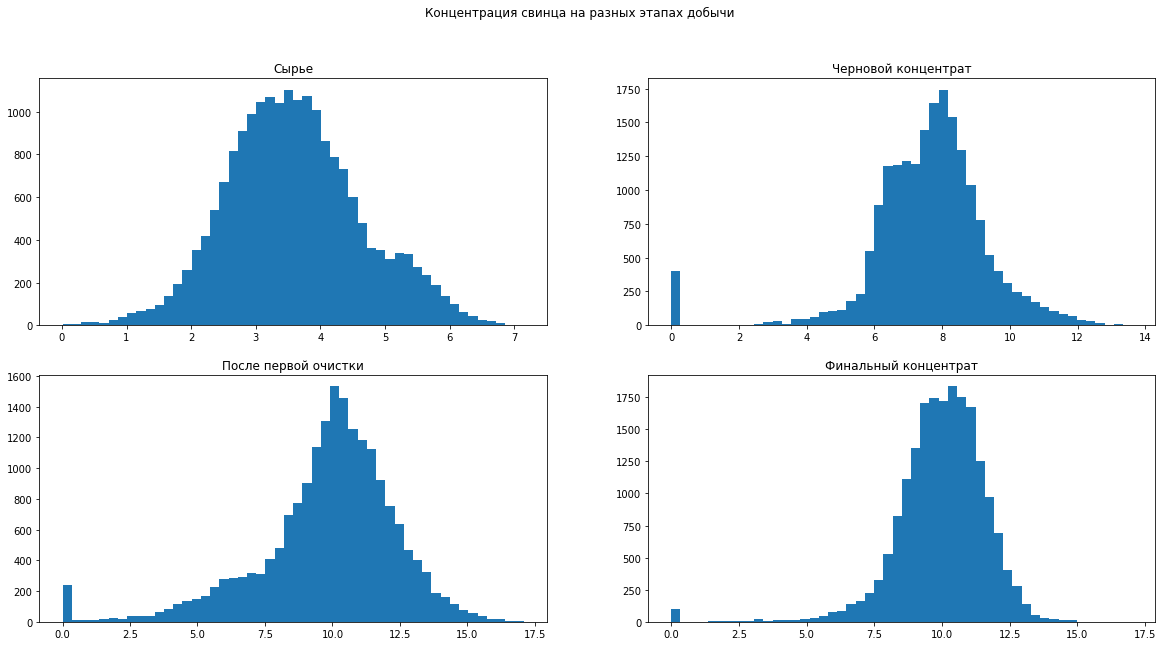

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0,0].hist(full['rougher.input.feed_pb'], bins = 50)
axs[0,1].hist(full['rougher.output.concentrate_pb'],bins = 50)
axs[1,0].hist(full['primary_cleaner.output.concentrate_pb'],bins = 50)
axs[1,1].hist(full['final.output.concentrate_pb'], bins = 50)

axs[0,0].set_title('Сырье')
axs[0,1].set_title('Черновой концентрат')
axs[1,0].set_title('После первой очистки')
axs[1,1].set_title('Финальный концентрат')
fig.suptitle('Концентрация свинца на разных этапах добычи')
plt.show()

Из графиков распределения концентрации металлов видно, что после проведения этапа флотации, часть значений лежит около 0, возможно это выбросы.

Не очищенное сырье имеет больший разброс значений для всех металлов.

После каждого этапа очистки для золота и свинца значение концентрации увеличились, для серебра на оборот снизились.

Все графики имете вид нормального распределения.

### Распределение размеров гранул исходного сырья

Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

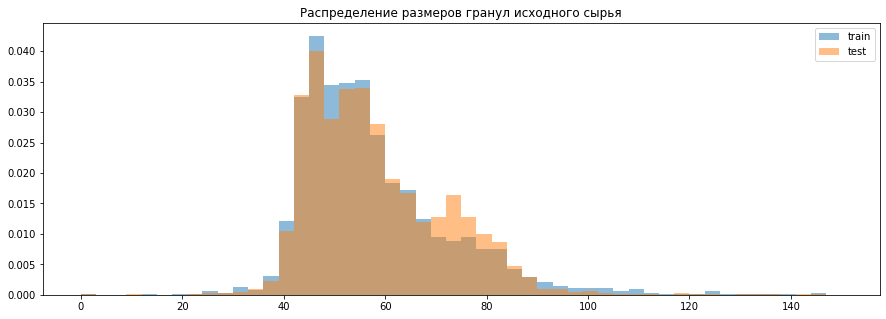

In [ ]:
# используем параметр density(логическое значение плотности),
# это позволит сравнить распределения с разным кол-вом значений

plt.figure(figsize=(15,5))
plt.hist(train['rougher.input.feed_size'], bins = 50, density=True, alpha=0.5, label='train', range = (0, 150))
plt.hist(test['rougher.input.feed_size'], bins= 50, density= True, alpha=0.5, label='test', range = (0, 150))
plt.legend(loc='upper right')
plt.title('Распределение размеров гранул исходного сырья')
plt.show()

Распределения размеров гранул исходного сырья на обучающей и тестовой выборках практически не отличаются, и в целом повторяют друг друга.

### Cуммарная концентрация металлов на разных стадиях

 Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [ ]:
# создадим функцию, которая на вход принимает датафрейм
# возвращает суммарную концентрацию на разных этапах

def total_concentration(data):
    total_rougher_input = data['rougher.input.feed_au']+ data['rougher.input.feed_ag']+ data['rougher.input.feed_pb']
    total_rougher_out = data['rougher.output.concentrate_au']+ data['rougher.output.concentrate_ag']+ data['rougher.output.concentrate_pb']
    total_primary = data['primary_cleaner.output.concentrate_au'] + data['primary_cleaner.output.concentrate_ag'] + data['primary_cleaner.output.concentrate_pb']
    total_final = data['final.output.concentrate_au']+ data['final.output.concentrate_ag']+ data['final.output.concentrate_pb']
    return total_rougher_input, total_rougher_out, total_primary, total_final

In [ ]:
# применим функцию к датафрейму с полными данными

total_rougher_input_full, total_rougher_out_full, total_primary_full, total_final_full = total_concentration(full)

Построим гистограмму для полученных значений

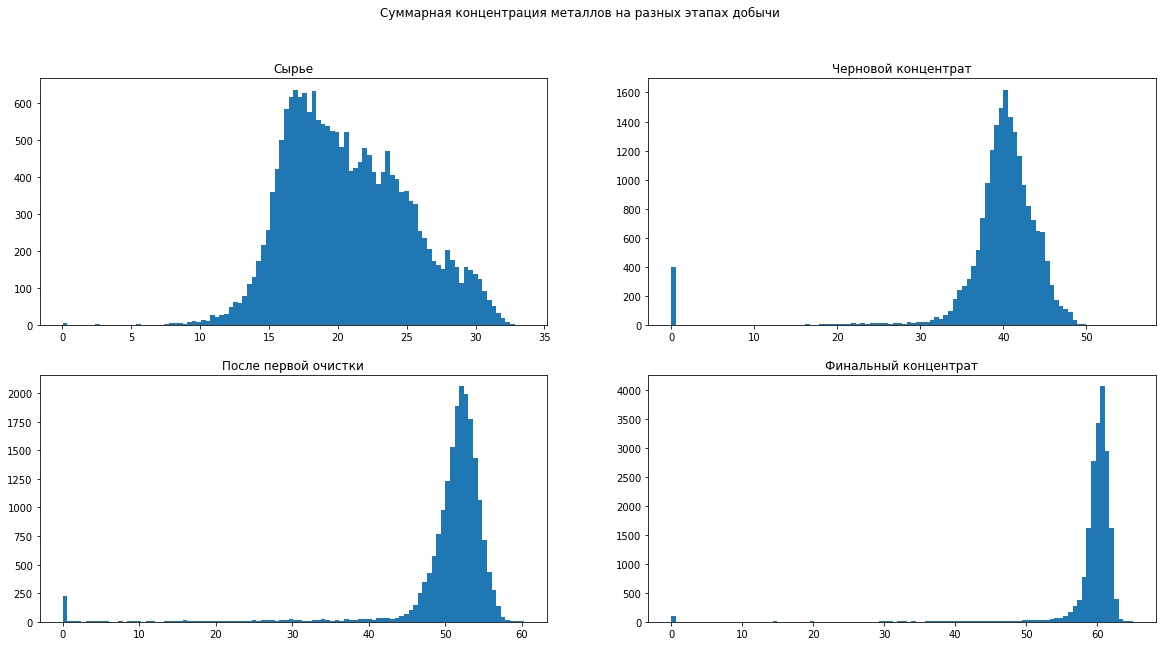

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0,0].hist(total_rougher_input_full, bins = 100)
axs[0,1].hist(total_rougher_out_full,bins = 100)
axs[1,0].hist(total_primary_full,bins = 100)
axs[1,1].hist(total_final_full, bins = 100)

axs[0,0].set_title('Сырье')
axs[0,1].set_title('Черновой концентрат')
axs[1,0].set_title('После первой очистки')
axs[1,1].set_title('Финальный концентрат')
fig.suptitle('Суммарная концентрация металлов на разных этапах добычи')
plt.show()

Сырье имеет более широкое распределение суммарной концентрации металлов по сравнению с этапами очистки.

Среднее значение концентрации с каждым этапом увеличивается.

На всех этапах очиски встречаются значения около 0.

Удалим те значения в обучающей выборке, для которых суммарная концентрация равна 0.

In [ ]:
# применим функцию total_concentration к обучающей выборке

total_rougher_input_train, total_rougher_out_train, total_primary_train, total_final_train = total_concentration(train)

In [ ]:
# удалим строки с выбросами из обучающей выборки
train = train.query('@total_rougher_out_train != 0 and @total_primary_train !=0 and @total_final_train !=0')

**Вывод**

Распределения размеров гранул исходного сырья на обучающей и тестовой выборках практически не отличаются, и в целом повторяют друг друга.

Сырье имеет более широкое распределение суммарной концентрации металлов по сравнению с этапами очистки.

Среднее значение концентрации с каждым этапом увеличивается.

На всех этапах очиски встречаются значения около 0.

Удалили выбросы в обучающей выборке.

## Модель

### Функция для вычисления sMAPE

Напишем функцию для вычисления итоговой sMAPE

In [ ]:
# функция для вычисления sMAPE
def smape( target, predict):

    result = 1/len(target)*sum((abs(target - predict))/((abs(target)+abs(predict))/2))*100

    return result

In [ ]:
# функция для вычисления итогового sMAPE
def final_smape(smape_rougher, smape_final):
    result = (0.25*smape_rougher + 0.75*smape_final)
    return result

Сделаем из функции пользовательскую метрику качества моделей

In [ ]:
custom_score = make_scorer(smape, greater_is_better = False)

### Обучение моделей

Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Уберем из обучающей выборки все признаки, отсутствующие в тестовой выборке, исходя из предположения, что тестовая выборка, это реальные данные, с которыми модель будет работать в производстве.

In [ ]:
test_columns = test.columns
train = train[test_columns]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13988 entries, 0 to 14578
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        13988 non-null  datetime64[ns]
 1   rougher.input.feed_au                       13988 non-null  float64       
 2   rougher.input.feed_ag                       13988 non-null  float64       
 3   rougher.input.feed_pb                       13988 non-null  float64       
 4   rougher.input.feed_sol                      13988 non-null  float64       
 5   rougher.input.feed_rate                     13988 non-null  float64       
 6   rougher.input.feed_size                     13988 non-null  float64       
 7   rougher.input.floatbank10_sulfate           13988 non-null  float64       
 8   rougher.input.floatbank10_xanthate          13988 non-null  float64       
 9   roughe

Выделим в обучающей и тестовой выборках признаки и целевые признаки

In [ ]:
# выделим в обучающей выборке целевые признаки
target_train_rougher = train['rougher.output.recovery']
target_train_final = train['final.output.recovery']

# уберем из датафрейма целевые признаки и столбец с датой
features_train = train.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)

In [ ]:
target_test_rougher = test['rougher.output.recovery']
target_test_final = test['final.output.recovery']

# уберем из датафрейма целевые признаки и столбец с датой
features_test = test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)

Произведем стандартизацию признаков для обучающей и тестовой выборок

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)
pd.options.mode.chained_assignment = None

#### Случайный лес

Обучим модель случайного леса и подберем лучшие гиперпараметры.

In [ ]:
%%time

# для флотации

model_random = RandomForestRegressor()
parametrs = { 'n_estimators': range (50, 100, 10),
              'max_depth': range (1,10, 2),
              'random_state':[12345]}

grid = GridSearchCV(model_random, parametrs, cv=3,scoring= custom_score, n_jobs = -1)
model_grid = grid.fit(features_train, target_train_rougher)
print('Параметры лучшей модели:', model_grid.best_params_)
print('sMAPE:', model_grid.best_score_)

Параметры лучшей модели: {'max_depth': 5, 'n_estimators': 70, 'random_state': 12345}
sMAPE: -6.576272931241484
CPU times: user 14min 6s, sys: 711 ms, total: 14min 7s
Wall time: 14min 10s


In [ ]:
%%time

# для финального концентрата

grid = GridSearchCV(model_random, parametrs, cv=3,scoring= custom_score, n_jobs = -1)
model_grid = grid.fit(features_train, target_train_final)
print('Параметры лучшей модели:', model_grid.best_params_)
print('sMAPE:', model_grid.best_score_)

Параметры лучшей модели: {'max_depth': 1, 'n_estimators': 90, 'random_state': 12345}
sMAPE: -9.747120641334766
CPU times: user 13min 33s, sys: 768 ms, total: 13min 34s
Wall time: 13min 35s


#### Решающее дерево

Обучим модель решающего дерева и подберем лучшие гиперпараметры.

In [ ]:
%%time
# для флотации

model_decision = DecisionTreeRegressor()
parametrs = { 'max_depth': range (1,10, 2),
              'min_samples_leaf': range (1,4),
              'min_samples_split': range (2,10,2),
              'random_state':[12345],}

grid = GridSearchCV(model_decision, parametrs, cv=3,scoring= custom_score)
model_grid = grid.fit(features_train, target_train_rougher)
print('Параметры лучшей модели:', model_grid.best_params_)
print('sMAPE:', model_grid.best_score_)

Параметры лучшей модели: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 12345}
sMAPE: -6.995546531947848
CPU times: user 45.4 s, sys: 99.9 ms, total: 45.5 s
Wall time: 45.8 s


In [ ]:
%%time
# для финального концентрата

grid = GridSearchCV(model_decision, parametrs, cv=3,scoring= custom_score)
model_grid = grid.fit(features_train, target_train_final)
print('Параметры лучшей модели:', model_grid.best_params_)
print('sMAPE:', model_grid.best_score_)

Параметры лучшей модели: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 12345}
sMAPE: -9.827527764547925
CPU times: user 45.4 s, sys: 44 ms, total: 45.5 s
Wall time: 45.5 s


#### Линейная регрессия

Обучим модель линейной регрессии.

In [ ]:
# для флотации

model_linear =LinearRegression()

scores = cross_val_score(model_linear, features_train, target_train_rougher,scoring = custom_score,  cv=3)
final_score = pd.Series(scores).mean()
final_score

-8.235503668932461

In [ ]:
# для финального концентрата

scores = cross_val_score(model_linear, features_train, target_train_final,scoring = custom_score,  cv=3)
final_score = pd.Series(scores).mean()
final_score

-10.880798440721916

Проверим модель случайного леса на тестовой выборке, так как она показала лучшую оценку качества


#### Тестирование модели

Используем гиперпараметры полученные для финального концентрата, так как исходя из формулы итогового sMAPE, данный показатель более значим

In [ ]:
# для флотации

model_forest = RandomForestRegressor(n_estimators=70, max_depth = 5, random_state=12345)
model_forest.fit(features_train, target_train_rougher)
predict_valid_forest = model_forest.predict(features_test)
smape_rougher_forest = smape(target_test_rougher, predict_valid_forest)
smape_rougher_forest

3.9268455356900036

In [ ]:
# для финального концентрата

model_forest = RandomForestRegressor(n_estimators=90, max_depth=1, random_state=12345)
model_forest.fit(features_train, target_train_final)
predict_valid_forest = model_forest.predict(features_test)
smape_final_forest = smape(target_test_final, predict_valid_forest)
smape_final_forest

8.712472868426877

Посчитаем итоговое sMAPE для случайного леса

In [ ]:
final_smape(smape_rougher_forest, smape_final_forest)

7.516066035242658

По результатам расчета итогового sMAPE модель случайного леса показала лучший результат

Проверим модель на адекватность, сравнив итоговое sMAPE с константной моделью со средним значением

In [ ]:
final_predict_constant = pd.Series([target_train_final.mean()]*len(target_test_final))
final_predict_constant

0       67.268748
1       67.268748
2       67.268748
3       67.268748
4       67.268748
          ...    
4855    67.268748
4856    67.268748
4857    67.268748
4858    67.268748
4859    67.268748
Length: 4860, dtype: float64

In [ ]:
rougher_predict_constant = pd.Series([target_train_rougher.mean()]*len(target_test_rougher))
rougher_predict_constant

0       84.864027
1       84.864027
2       84.864027
3       84.864027
4       84.864027
          ...    
4855    84.864027
4856    84.864027
4857    84.864027
4858    84.864027
4859    84.864027
Length: 4860, dtype: float64

In [ ]:
constant_smape_final=smape(target_test_final, final_predict_constant)
constant_smape_final

9.260753294636773

In [ ]:
constant_smape_rougher = smape(target_test_rougher, rougher_predict_constant)
constant_smape_rougher

6.108333121374734

In [ ]:
final_smape(constant_smape_rougher, constant_smape_final)

8.472648251321264

Итоговое sMAPE для константной модели больше итогового sMAPE дла модели случайного леса.

Полученная модель адекватна

## Общий вывод

Распределения размеров гранул исходного сырья на обучающей и тестовой выборках практически не отличаются, и в целом повторяют друг друга

Сырье имеет более широкое распределение суммарной концентрации металлов по сравнению с этапами очистки.

Среднее значение концентрации с каждым этапом увеличивается.

Для обучения молели из обучающей выборки были убраны все признаки, отсутствующие в тестовой выборке, предпологая что тестовая выборка это реальные данные, с которыми модель будет работать в производстве.

Прототип модели предсказывает коэффициент восстановления золота из золотосодержащей руды с учетом важности не только финальный продукта, но и чернового концентрата.

**Итоговые паметры модели**

модель - RandomForestRegressor

количество деревьев - 90

глубина дерева - 1

итоговое sMAPE - 7.53 %
